<a href="https://colab.research.google.com/github/Joaovmir/DataScience_Exercises/blob/main/covid_estados_cidades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise dos dados:

Análise dos dados de Covid-19

Import das bibliotecas usadas

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Import dos dados a serem usados

In [3]:
dados = pd.read_csv('/content/COVID19-BRASILIO-06-11-2020.csv.gz',sep=',')

In [4]:
dados.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224


Número de linhas e colunas

In [5]:
dados.shape

(936870, 13)

Número de dados nulos em cada coluna

In [6]:
dados.isnull().sum()

date                                  0
state                                 0
city                               6335
place_type                            0
confirmed                             0
deaths                                0
order_for_place                       0
is_last                               0
estimated_population_2019          3655
estimated_population               3655
city_ibge_code                     3655
confirmed_per_100k_inhabitants    16982
death_rate                            0
dtype: int64

Tentativa de encontrar o número de mortes por estado

Inicialmente tentei somar a quantidade de mortes agrupadas em cada estado, mas a coluna Deaths mostra o total acumulado, então utilizei a função max.

Mas cada registro é de uma cidade, então o que essa análise sugere é que esse é o número de mortes pela maior cidade de cada estado.

In [80]:
estados = dados[['state','deaths']].groupby('state').max('deaths') 
estados

,deaths
state,
AC,697
AL,2258
AM,4607
AP,751
BA,7731
CE,9392
DF,3728
ES,3896
GO,5869


Colocando os dados em ordem do maior valor para o menor

In [33]:
estados = estados.sort_values('deaths',ascending=False)

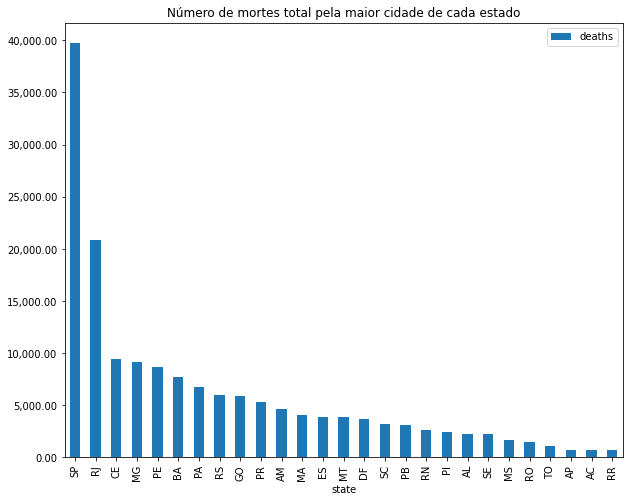

In [77]:
ax = estados.plot(kind='bar', figsize=(10,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title('Número de mortes total pela maior cidade de cada estado')
plt.show()

Selecionando agora os últimos dados que foram inseridos através da coluna is_last

In [48]:
ultimos_dados = dados.loc[dados['is_last']==True]

In [52]:
ultimos_dados

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
234,2020-11-05,AC,Acrelândia,city,492,11,211,True,15256.0,15490.0,1200013.0,3176.24274,0.0224
445,2020-11-05,AC,Assis Brasil,city,711,9,178,True,7417.0,7534.0,1200054.0,9437.21795,0.0127
623,2020-11-05,AC,Brasiléia,city,1188,19,170,True,26278.0,26702.0,1200104.0,4449.10494,0.0160
793,2020-11-05,AC,Bujari,city,406,7,201,True,10266.0,10420.0,1200138.0,3896.35317,0.0172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
936030,2020-11-05,SP,Águas de São Pedro,city,61,1,201,True,3451.0,3521.0,3500600.0,1732.46237,0.0164
936231,2020-11-05,SP,Álvares Florence,city,74,5,152,True,3679.0,3647.0,3501202.0,2029.06498,0.0676
936383,2020-11-05,SP,Álvares Machado,city,281,8,183,True,24915.0,24998.0,3501301.0,1124.08993,0.0285
936566,2020-11-05,SP,Álvaro de Carvalho,city,26,4,173,True,5227.0,5274.0,3501400.0,492.98445,0.1538


Número de linhas e colunas

In [67]:
ultimos_dados.shape

(5613, 13)

Um resumo da taxa de morte dos últimos dados, há um valor com taxa de morte de 1, o que atrapalha na análise dos dados por fugir muito da média geral dos dados

In [53]:
ultimos_dados['death_rate'].describe()

count    5613.000000
mean        0.025617
std         0.031978
min         0.000000
25%         0.009700
50%         0.020000
75%         0.032400
max         1.000000
Name: death_rate, dtype: float64

Isso pode ser checado através do Boxplot abaixo

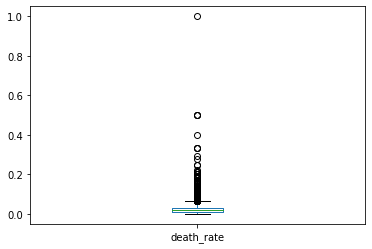

In [70]:
ultimos_dados['death_rate'].plot(kind='box')

Encontrando o registro que possui a taxa de morte = 1 e removendo ele do conjunto de dados, repare que a cidade se chama Importados/Indefinidos

In [72]:
ultimos_dados.loc[ultimos_dados['death_rate']==1]

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
26192,2020-11-02,AL,Importados/Indefinidos,city,8,8,219,True,NaN,NaN,NaN,NaN,1.0


In [73]:
ultimos_dados = ultimos_dados.drop(26192)

In [75]:
ultimos_dados['death_rate'].describe()

count    5612.000000
mean        0.025444
std         0.029216
min         0.000000
25%         0.009700
50%         0.020000
75%         0.032400
max         0.500000
Name: death_rate, dtype: float64

Ainda há muitos valores discrepantes em relação à média das cidades no geral no país

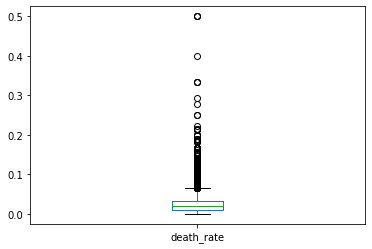

In [76]:
ultimos_dados['death_rate'].plot(kind='box')

Selecionando agora a soma de todos os últimos registros agrupado por estados

In [56]:
estados2 = ultimos_dados[['state','deaths']].groupby('state').sum('deaths')
estados2

,deaths
state,
AC,1394
AL,4504
AM,9172
AP,1500
BA,15462
CE,18784
DF,7447
ES,7388
GO,11738


In [57]:
estados2 = estados2.sort_values('deaths',ascending=False)

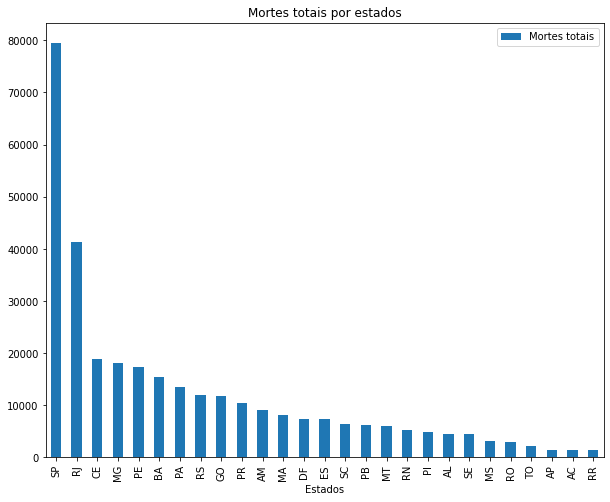

In [66]:
ax = estados2.plot(kind='bar',figsize=(10,8),xlabel='Estados')
plt.title('Mortes totais por estados')
plt.legend(labels=['Mortes totais'],loc='best')
plt.show()

# Análise da taxa de morte entre as cidades mais populosas

In [82]:
dados_limpos = ultimos_dados.dropna()

In [83]:
dados_limpos.isnull().sum()

date                              0
state                             0
city                              0
place_type                        0
confirmed                         0
deaths                            0
order_for_place                   0
is_last                           0
estimated_population_2019         0
estimated_population              0
city_ibge_code                    0
confirmed_per_100k_inhabitants    0
death_rate                        0
dtype: int64

In [84]:
dados_limpos.shape

(5566, 13)

In [87]:
dados_limpos = dados_limpos.sort_values('estimated_population',ascending=False)
dados_limpos

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
923715,2020-11-05,SP,São Paulo,city,319156,13715,237,True,12252023.0,12325232.0,3550308.0,2589.45227,0.0430
561809,2020-10-28,RJ,Rio de Janeiro,city,117956,12009,225,True,6718903.0,6747815.0,3304557.0,1748.06215,0.1018
39128,2020-11-04,DF,Brasília,city,188233,3423,242,True,3015268.0,3055149.0,5300108.0,6161.17250,0.0182
146988,2020-11-05,BA,Salvador,city,91769,2910,233,True,2872347.0,2886698.0,2927408.0,3179.03016,0.0317
51243,2020-11-05,CE,Fortaleza,city,56698,3920,230,True,2669342.0,2686612.0,2304400.0,2110.39034,0.0691
...,...,...,...,...,...,...,...,...,...,...,...,...,...
814691,2020-11-04,TO,Oliveira de Fátima,city,61,1,137,True,1112.0,1118.0,1715507.0,5456.17174,0.0164
744972,2020-11-05,RS,Engenho Velho,city,11,0,135,True,1034.0,982.0,4306924.0,1120.16293,0.0000
257608,2020-08-10,MT,Araguainha,city,2,0,37,True,935.0,946.0,5101209.0,211.41649,0.0000
835911,2020-11-05,SP,Borá,city,5,0,147,True,837.0,838.0,3507209.0,596.65871,0.0000


In [91]:
mais_populosas = dados_limpos[['city','death_rate']].head(10)
mais_populosas

,city,death_rate
923715,São Paulo,0.0430
561809,Rio de Janeiro,0.1018
39128,Brasília,0.0182
146988,Salvador,0.0317
51243,Fortaleza,0.0691
418846,Belo Horizonte,0.0307
14856,Manaus,0.0457
604143,Curitiba,0.0344
360832,Recife,0.0671
231681,Goiânia,0.0260


In [ ]:
mais_populosas = mais_populosas.set_index('city')

In [98]:
mais_populosas

,death_rate
city,
São Paulo,0.0430
Rio de Janeiro,0.1018
Brasília,0.0182
Salvador,0.0317
Fortaleza,0.0691
Belo Horizonte,0.0307
Manaus,0.0457
Curitiba,0.0344
Recife,0.0671


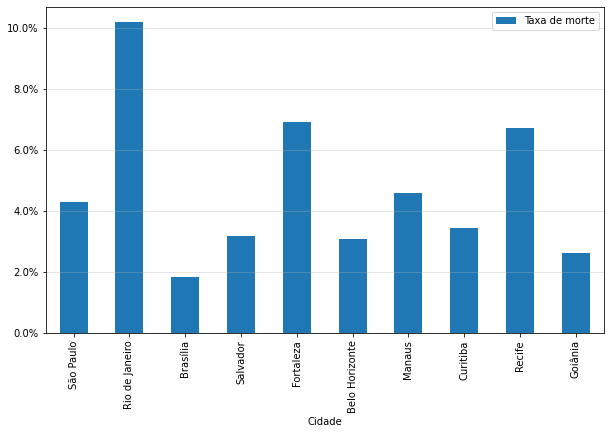

In [120]:
ax = mais_populosas.plot(kind='bar',xlabel='Cidade',figsize=(10,6))
plt.legend(labels=['Taxa de morte'])
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
plt.grid(axis='y',alpha=0.4)

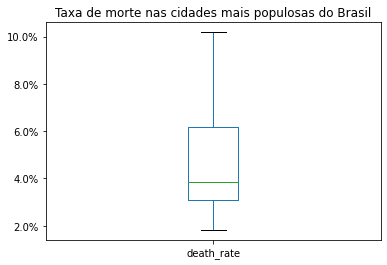

In [142]:
ax = mais_populosas['death_rate'].plot(kind='box')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
ax.xaxis.set_label_text('')
plt.title('Taxa de morte nas cidades mais populosas do Brasil')
plt.show()

# Mortes totais por cidades mais populosas

In [122]:
mais_populosas2 = dados_limpos[['city','deaths']].head(10)
mais_populosas2

,city,deaths
923715,São Paulo,13715
561809,Rio de Janeiro,12009
39128,Brasília,3423
146988,Salvador,2910
51243,Fortaleza,3920
418846,Belo Horizonte,1494
14856,Manaus,2902
604143,Curitiba,1388
360832,Recife,2469
231681,Goiânia,1731


In [123]:
mais_populosas2 = mais_populosas2.set_index('city')
mais_populosas2

,deaths
city,
São Paulo,13715
Rio de Janeiro,12009
Brasília,3423
Salvador,2910
Fortaleza,3920
Belo Horizonte,1494
Manaus,2902
Curitiba,1388
Recife,2469


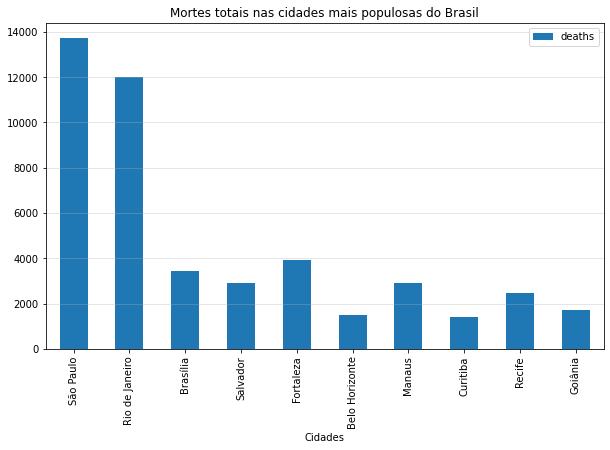

In [137]:
ax = mais_populosas2.plot(kind='bar',xlabel='Cidades',figsize=(10,6))
plt.title('Mortes totais nas cidades mais populosas do Brasil')
plt.grid(axis='y',alpha=0.4)
plt.show()